# Car Sale Value Prediction

---

**The price of a car depends on a lot of factors like the goodwill of the brand of the car,**
**features of the car, horsepower and the mileage it gives and many more. Car price**
**prediction is one of the major research areas in machine learning. So if you want to learn**
**how to train a car price prediction model then this project is for you.**

## 1. Import Libraries 

In [11]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Models and Utils
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [13]:
# For saving the created model
import pickle as pkl

In [14]:
# For cleaner output 
import warnings 
warnings.filterwarnings("ignore")

## 2. Loading Dataset

In [16]:
# file
path = "car data.csv"
# Car_Name column is being dropped (consists of more unique values & it's irrelevant unless any other usage)
df = pd.read_csv(path).drop("Car_Name" , axis = 1) 

df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 3. EDA

---

- Dataset Info
- Statistical Summary 
- Null value analaysis
- Distribution of Target
- Distribution of Features


In [17]:
# info
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 60.9 KB


In [19]:
# Statistical Summary (included only int64 and float64)
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [20]:
# Null value analysis
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
# categorical columns value counts
columns = ["Fuel_Type" , "Selling_type" , "Transmission"]
for col in columns:
    print("\n" , df[col].value_counts())


 Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

 Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64

 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


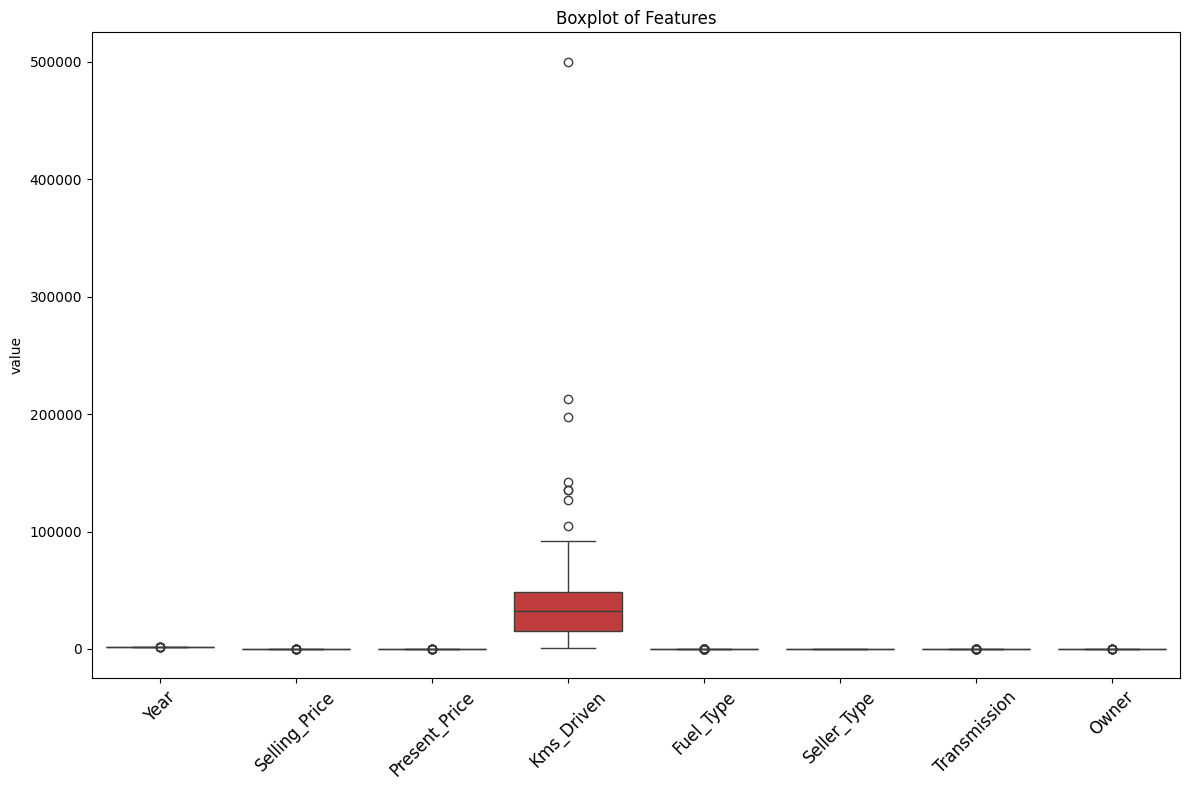

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)
plt.title("Boxplot of Features")
plt.xticks(rotation = 45 , fontsize = 12)
plt.ylabel("value")
plt.tight_layout()
plt.show()

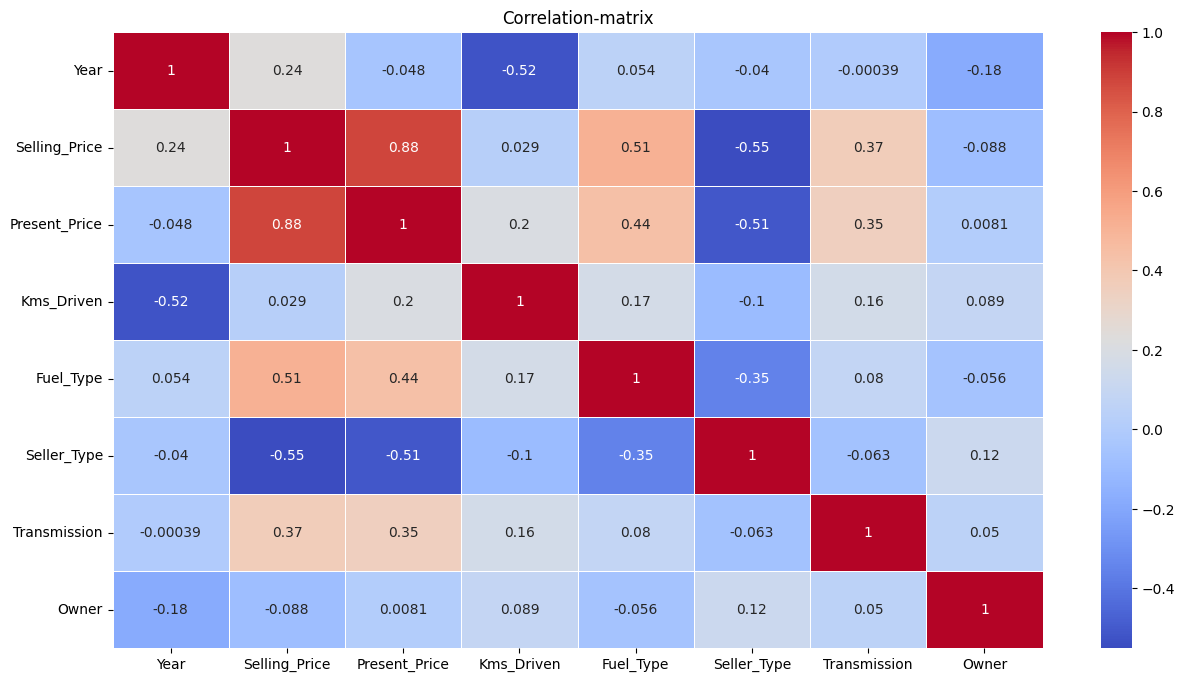

In [ ]:
# correlation matrix & heatmap
correlation_matrix = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap( data = correlation_matrix , annot = True , cmap = "coolwarm" , linewidth = 0.5)
plt.title("Correlation-matrix")
plt.show()

### Spliting Data

In [ ]:
x = df.drop("Selling_Price" , axis = 1)
y = df["Selling_Price"]

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 42)

In [ ]:
# shape

print("x shape" , x.shape)
print("x train shape - " , x_train.shape)
print("x test shape - " , x_test.shape)
print("y shape" , y.shape)
print("y train shape - " , y_train.shape)
print("y test shape - " , y_test.shape)

x shape (301, 7)
x train shape -  (240, 7)
x test shape -  (61, 7)
y shape (301,)
y train shape -  (240,)
y test shape -  (61,)


### Model : LinearRegression model is being used

In [ ]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [ ]:
# training data score
training_data_predict = model.predict(x_train)
training_data_accuracy = metrics.r2_score(  y_train , training_data_predict )
print("accuracy of training data : " , training_data_accuracy)

accuracy of training data :  0.8839793496750795


In [ ]:
# predicting

y_pred = model.predict(x_test)

y_pred

array([ 2.96670467,  8.3025584 ,  6.05620758, -1.46814968,  9.25713882,
        7.032306  ,  1.35164871,  0.8268692 ,  1.37173108,  7.10742891,
        8.74382695,  0.58613312,  8.50347194,  3.42803571,  6.50183791,
        3.08701389,  0.46323861, 10.8959559 ,  1.76487652,  2.36736645,
        0.37538646,  7.73247978,  6.2075281 ,  2.64722707,  0.78232086,
        3.72073841,  5.33393873,  2.83824054,  2.16090172,  1.77220708,
        0.37859447,  8.79078642, -0.7007019 ,  2.2988819 ,  8.21516023,
        4.54037167,  7.35322104,  7.6823757 ,  2.91768184,  8.08080852,
        3.99669454,  4.34672417,  4.36388106,  0.61018923,  6.94478948,
        0.47281585,  7.41596672, 11.44059317,  3.14822313,  4.95097368,
        6.86250813,  2.19862524, 20.53946595, 16.79146986,  7.13952545,
        9.830903  ,  4.49886186,  8.62078376,  1.810855  ,  7.67299866,
        0.21098592])

In [ ]:
# accuracy for testing data
test_data_accuracy = metrics.r2_score(y_test , y_pred)
print("Test data r2 score (accuracy) : " , test_data_accuracy )

Test data r2 score (accuracy) :  0.8468053957654694


In [ ]:
# mean absolute error 
MAE = metrics.mean_absolute_error(y_test , y_pred)
print("mean absolute error : " , MAE)

mean absolute error :  1.2217615462338127


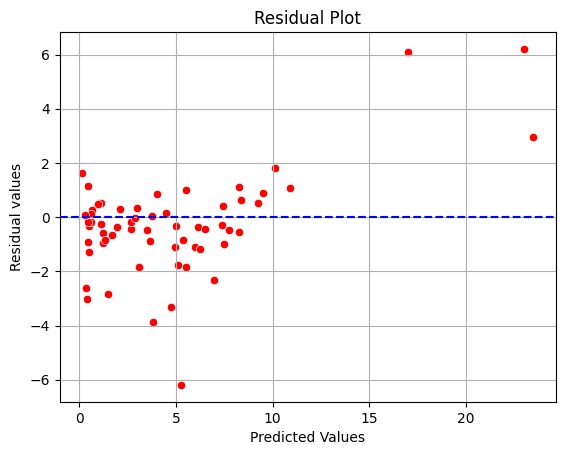

In [ ]:
# residuals 
residuals = y_test - y_pred 

sns.scatterplot(x = y_test , y = residuals , color = "red")
plt.axhline(0 , color = "blue" , linestyle = "--")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residual values")
plt.grid(True)
plt.show()

In [ ]:
# for manual data prediction 
def manual_prediction(input_data):
    input_data_as_np = np.asarray(input_data)
    input_data_reshaped = input_data_as_np.reshape(1,-2)
    prediction = model.predict(input_data_reshaped)
    return round(prediction[0] , 2 )

In [ ]:
# manual data
input_data = (2014,5.59,27000,0,0,0,0)
result = manual_prediction(input_data)
print('predicted price of car',result ,"lakhs")

predicted price of car 3.96 lakhs


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# manual data
input_data = (  2020 , 9.5, 35000, 0, 0, 1, 1)
result = manual_prediction(input_data)
print("predicted price of car" , result , "lakhs")

predicted price of car 8.54 lakhs


c:\Users\LEGION\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Saving the model

In [ ]:
with open("car_sales_models.pkl", "wb") as file:
    pkl.dump(model , file)
